In [7]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plb
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.metrics import f1_score,classification_report,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#exclude printing warn messages
def warn(*args,**kwargs):
     pass
import warnings
warnings.warn = warn

In [3]:
#reading data
data=pd.read_csv('churndata_processed.csv')

In [4]:
data.sample(5)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
6236,1.00,1,0.200000,1,1,1,1,1,1.0,0,...,1,0,1,0,0,1,0,0,0,0
2200,0.75,1,0.341176,0,0,0,0,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2428,0.00,0,0.082353,0,0,0,0,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
238,0.00,0,0.176471,0,0,0,0,1,0.0,0,...,0,0,1,0,0,0,0,0,0,1
575,0.75,1,0.141176,0,0,0,0,1,0.5,1,...,1,0,0,1,0,0,0,0,0,0


In [5]:
data.shape

(7043, 23)

<!-- to turn all columns to lowercase  -->
data.columns=data.columns.str.lower()

NameError: name 'plb' is not defined

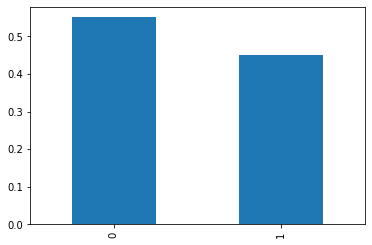

In [6]:
# proportion of people who got an offer
data.filter(like='offer').sum(1).value_counts(normalize=True).plot(kind='bar')
plb.xticks(range(2),['No','Yes'])
plb.ylim(0,1)

In [ ]:
data.dtypes.value_counts()

In [ ]:
list(range(1,-1,-1))

In [ ]:
# NUmber of people who churned vs not churned
data.filter(like='churn').value_counts().plot(kind='bar')
plb.xticks(range(1,-1,-1),['Not Churned','Churned'])
plb.xlabel('Churn Value')

In [ ]:
data.describe().T

In [ ]:
satisfaction_corr=data.corr()['churn_value'].abs().plot(kind='bar')
plb.title('Correlation of Churn Value and other features')

In [ ]:

trils=zip(*(np.tril_indices_from(data.corr())))
data_corr=data.corr()
for a in trils: 
    data_corr.iloc[a[0],a[1]]=np.nan
data_corr=data_corr.stack().to_frame().reset_index().rename(columns={'level_0':'f1','level_1':'f1',0:'coef'})
data_corr['coef']=np.abs(data_corr['coef'])
ax=data_corr['coef'].plot(kind='hist',bins=50)

In [ ]:
X=data.drop('churn_value',axis=1)
y=data['churn_value']

In [ ]:
kf=StratifiedShuffleSplit(n_splits=5,test_size=0.3)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y)

In [ ]:
lr=LogisticRegression()

In [ ]:
lr_l1=LogisticRegressionCV(penalty='l1',Cs=[0,1,1,10],random_state=11,cv=kf)

In [ ]:
lr_l2=LogisticRegressionCV(penalty='l2',Cs=[0.1,1,10],random_state=21,cv=kf)

In [ ]:
def check_scores(model):
    model_coefs=[]
    lr__=lr.fit(X_train,y_train)
    pred =lr__.predict(X_test)
    model_coefs.append(lr__.coef_)
    return model_coefs,pred

In [ ]:
models=[lr,lr_l1,lr_l2]
model_name=['lr','lr_l1','lr_l2']
models_coef={}
model_preds={}
for name,mod in zip(model_name,models):
    models_coef[name],model_preds[name]=check_scores(mod)

In [ ]:
# Dataframing model coefficients
mod_coef_df = pd.DataFrame({k:v for k,v in model_preds.items()})
mod_coef_df.sample(3)

In [ ]:
y_pred_all=pd.DataFrame(model_preds)

In [ ]:
# Set up subplots
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

# Plot and add labels for legend
sns.distplot(mod_coef_df['lr'], hist=False, ax=ax, label='lr')
sns.distplot(mod_coef_df['lr_l1'], hist=False, ax=ax1, label='lr_l1')
sns.distplot(mod_coef_df['lr_l2'], hist=False, ax=ax2, label='lr_l2')

# Set plot titles
ax.set_title('Kernel Density Estimation for lr')
ax1.set_title('Kernel Density Estimation for lr_l1')
ax2.set_title('Kernel Density Estimation for lr_l2')

# Set common y-axis label
plb.ylabel('Density')

plb.tight_layout()
# Show the plots
plb.show()


In [ ]:
# logistic Regression confusion matrix
cm_lr=confusion_matrix(y_test,mod_coef_df['lr'])
cm_lr

In [ ]:
sns.heatmap(cm_knn,annot=True,fmt='d',xticklabels=['Not Churned', 'Churned'],yticklabels=['Not Churned', 'Churned'])
# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
for lr_pred in y_pred_all:
    print(lr_pred,end='\n\n')
    print(precision_recall_fscore_support(y_test,y_pred_all[lr_pred],average='weighted'),end='\n\n')
    print(classification_report(y_test,y_pred_all[lr_pred]))

The best model to use is the **K Nearest Neighbor** Model which has an average model F1 Score of 95% and model accuracy of 95% 

In [ ]:
list_=[]
for k in range(1,40):
    knn_churn=KNeighborsClassifier(n_neighbors=k)

    y_pred_knn=knn_churn.fit(X_train,y_train).predict(X_test)

    list_.append((k,precision_recall_fscore_support(y_test,y_pred_knn,average='weighted')[2]))

In [ ]:
scores_=pd.DataFrame(list_,columns=['k','F1_Score'])
scores_.set_index('k',inplace=True)

In [ ]:
scores_['F1_Score'].idxmax()

In [ ]:
# k Graph
scores_.plot(marker='.')
plb.xticks(range(1,scores_.shape[0],5))
plb.show()

In [ ]:
knn_churn=KNeighborsClassifier(n_neighbors=scores_['F1_Score'].idxmax())
y_pred_knn=knn_churn.fit(X_train,y_train).predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_proba_knn=knn_churn.fit(X_train,y_train).predict_proba (X_test)

In [ ]:
#KNN confusion matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)

In [ ]:
sns.heatmap(cm_knn,annot=True,fmt='d',xticklabels=['Not Churned', 'Churned'],yticklabels=['Not Churned', 'Churned'])
# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Create Dataframe of predicted churn value probability and churn value 
churn_df=pd.DataFrame(pd.Series(y_pred_knn,y_pred_proba_knn.max(1))).reset_index().rename(columns={'index':'churn_proba', 0:'churn_value'})
churn_df.head()

In [ ]:
print(precision_recall_fscore_support(y_test,y_pred_knn,average='weighted'))
print(classification_report(y_test,y_pred_knn))

The modeld used is the **K Nearest Neighbor** Model which has an average model F1 Score of 90% and model accuracy of 90% 

|Date Created | Author|
|-|-|
|14/10/2023|Abiodun I Olorunsogo|